**a trous wavelet transform**

https://www.eso.org/sci/software/esomidas//doc/user/98NOV/volb/node317.html

In [1]:
import numpy as np
from scipy import fftpack,signal

def build_atrous_coef(j, method):
    if method == 'B_spline':
        if j == 0:
            atrous_coef = np.matrix([1/16.0, 1/4.0, 3/8.0, 1/4.0, 1/16.0])
            return np.array(np.matmul(atrous_eff.T,atrous_eff))
        elif j >= 1:
            len_atrous_eff = 5 + 2**(j+1)
            atrous_coef = np.zeros(len_atrous_eff)
            atrous_coef[0] = 1/16.0
            atrous_coef[int(2**(j-1)+1)] = 1/4.0
            atrous_coef[int((len_atrous_eff-1)/2)] = 3/8.0
            atrous_coef[int(3*2**(j-1)+3)] = 1/4.0
            atrous_coef[-1] = 1/16.0
            atrous_coef = np.matrix(atrous_coef)
            return np.array(np.matmul(atrous_coef.T, atrous_coef))
        else:
            print("Please input a positive integer")
    elif method == 'linear':
        if j == 0:
            atrous_coef = np.matrix([0.25,0.5,0.25])
            return np.array(np.matmul(atrous_eff.T,atrous_eff))
        elif j >= 1:
            len_atrous_eff = 3 + 2**j
            atrous_coef = np.zeros(len_atrous_eff)
            atrous_coef[0] = 0.25
            atrous_coef[int((len_atrous_eff-1)/2)] = 0.5
            atrous_coef[-1] = 0.25
            atrous_coef = np.matrix(atrous_coef)
            return np.array(np.matmul(atrous_coef.T, atrous_coef))
        else:
            print("Please input a positive integer")
    else:
        print("choose a method: 'B_spline' or 'linear'")
        
def a_trous_wavelet_2D(input_data, level_num, method='B_spline'):
    if method == 'B_spline':
        if level_num == 1:
            len_atrous_coef = 5
        elif level_num >= 2:
            len_atrous_coef = 5 + 2**(level_num)
        else:
            print("Please input a positive integer")
    elif method == 'linear':
        if level_num == 1:
            len_atrous_coef = 3
        elif level_num >= 2:
            len_atrous_coef = 3 + 2**(level_num-1)
        else:
            print("Please input a positive integer")
    else:
        print("choose a method: 'B_spline' or 'linear'")
        return 0
        
    data_shape = np.shape(input_data)

    if np.min(data_shape) > len_atrous_coef:
        output_c = np.empty(shape=(data_shape[0],data_shape[1],level_num))
        wavelet_coef = np.empty(shape=(data_shape[0],data_shape[1],level_num))
        output_c[:,:,0] = np.copy(input_data)
        for i in range(1,level_num):
            output_c[:,:,i] = signal.convolve(input_data, build_atrous_coef(i, method), mode = "same")
        wavelet_coef[:,:,:-1] = -np.diff(output_c, axis=2)
        wavelet_coef[:,:,-1] = np.copy(output_c[:,:,-1])
        return wavelet_coef
    else:
        print('Please reduce the number of level')


**read Solar Orbiter/EUI-HRI 174 map**

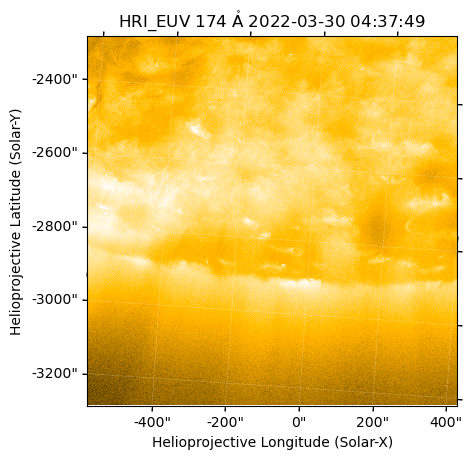

In [2]:
import sunpy.map
import matplotlib.pyplot as plt

euihri_map = sunpy.map.Map('/Users/hcp/sunpy/data/solo_L2_eui-hrieuvopn-image_20220330T043748222_V02.fits')
euihri_map.plot(vmin=0, vmax=2500)

**Applying A trous wavelet transform**

In [3]:
input_data = euihri_map.data
output_w = a_trous_wavelet_2D(input_data, level_num=4, method='linear')

**Reconstruct map with high fine-scale structures**

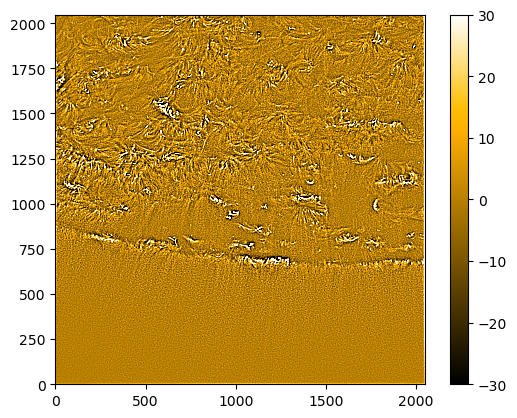

In [4]:
reconstruct_map = output_w[:,:,1] + output_w[:,:,2]
plt.imshow(reconstruct_map, vmin=-30, vmax=30, cmap='sdoaia171', origin='lower')
plt.colorbar()